<a href="https://colab.research.google.com/github/haytocan/Deprem-ve-Yapay-Zeka/blob/main/GlobalAI_Proje_webinar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Kütüphaneler


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [ ]:
tf.keras.datasets.

## 2. Veri setini yükle

In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
## X_train boyut,
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
## 60000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 28*28 boyutunda

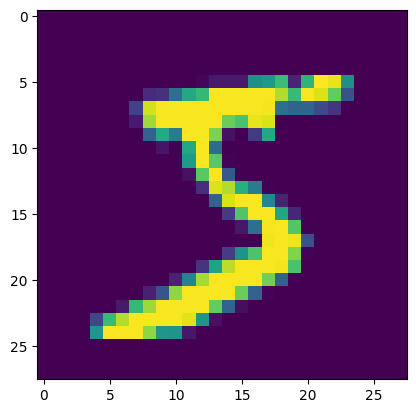

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

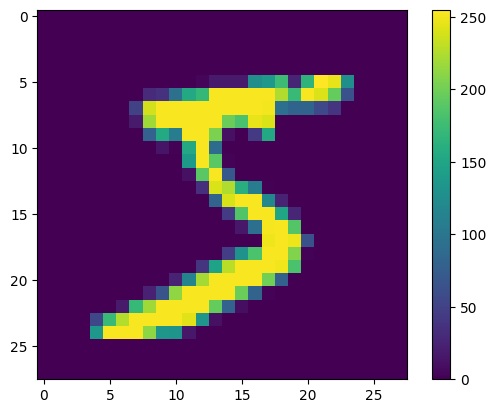

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

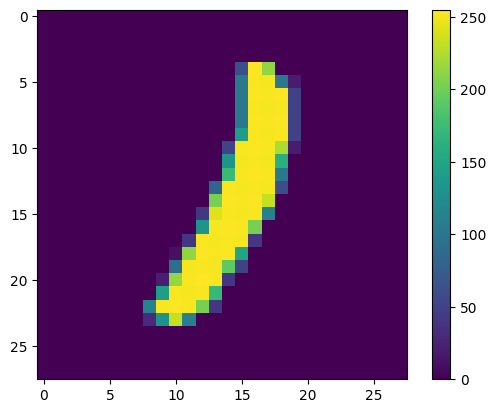

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[78])
plt.colorbar()
plt.grid(False)
plt.show()

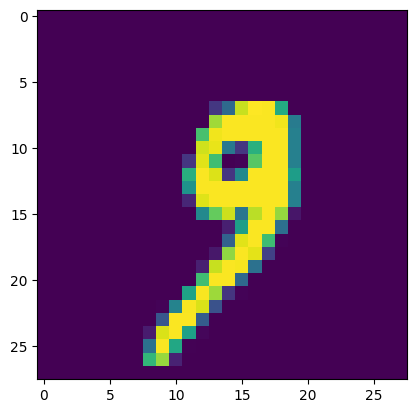

In [ ]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_test[1000])
#plt.colorbar()
plt.grid(False)
plt.show()

## 3. Verileri Normalleştirelim

In [ ]:
# Verileri 0-1 arasına sıkıştıralım
# Neden 255 e böldük?

X_train = X_train / 255.0

X_test = X_test / 255.0

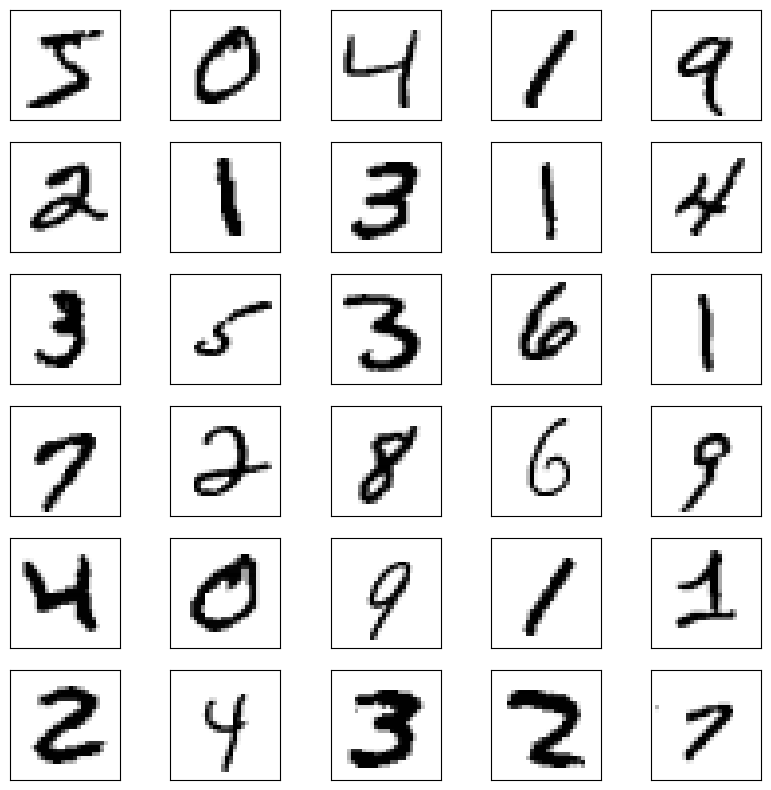

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

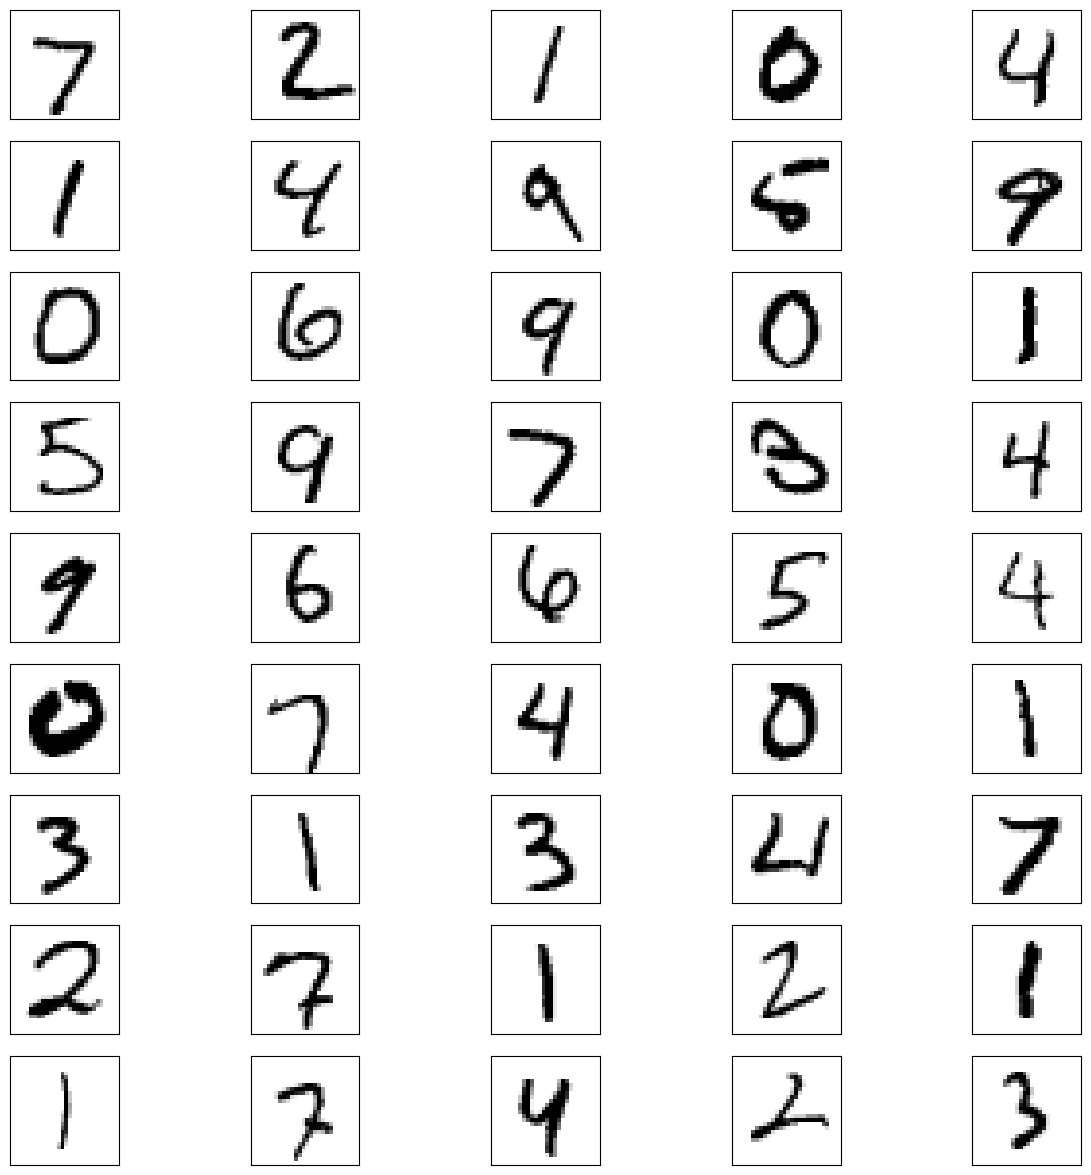

In [ ]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

### 4. Makine Öğrenmesi Modeli Oluşturma

In [ ]:
X_train.shape[0]

60000

In [ ]:

# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
## X_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür. (28*28=784)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 28 * 28)
# X_train.reshape(60000,784)
#X_test = X_test.reshape(X_test.shape[0], 28 * 28)


In [ ]:
#?KNeighborsClassifier

In [ ]:
## KNN modeli

knn=KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
acc

0.9688

In [ ]:
f1

0.9687470572168784

In [ ]:
recall

0.9688

In [ ]:
precision

0.9690205934964162

In [ ]:
## Random Forest oluştur

In [ ]:
## Karar Ağacı oluştur

In [ ]:
# Destek Vektör Makineleri için oluştur(SVC,SVM)

### ÖDEV: Diğer Makine öğrenmesi modelleri için uygulama yapınız

## 5. YSA ile Model Eğitimi

In [ ]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
# veri normalleştirme

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# burdaki -1 yine otomotik olarak uygun değeri belirliyor -1 yerine direk örnek sayısını yazabilirsiniz ör:60000 veya X_train.shape[0], X_test.shape[0]
# 28*28 boyutlu 1 kanalı görüntüye çevirdik (gray), ayrıca veri tipini float32 yapıp normalize ettik
# şu kodda aynı sonucu verir;

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0


In [ ]:
## classlar için one hot encoding işlemi yapalım


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 3270 (12.77 KB)
Trainable params: 3270 (12.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8672 - accuracy: 0.7241 - val_loss: 0.6179 - val_accuracy: 0.8095
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5829 - accuracy: 0.8230 - val_loss: 0.5458 - val_accuracy: 0.8360
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5365 - accuracy: 0.8390 - val_loss: 0.5202 - val_accuracy: 0.8436
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5134 - accuracy: 0.8462 - val_loss: 0.5010 - val_accuracy: 0.8496
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4939 - accuracy: 0.8518 - val_loss: 0.4926 - val_accuracy: 0.8512
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4744 - accuracy: 0.8598 - val_loss: 0.4783 - val_accuracy: 0.8542
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4575 - accuracy: 0.8643 - val_loss: 0.4552 - val_accuracy:

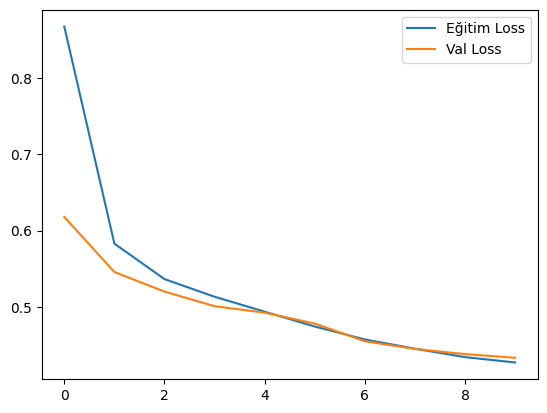

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()



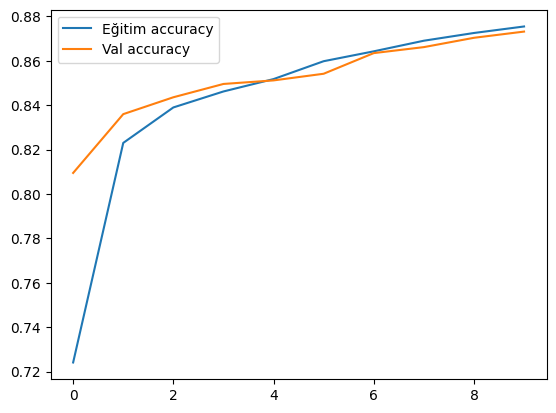

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

## ÖDEV

## ## Katman sayısı, noron sayıları, epoch sayısı, düzenlileştirme yöntemleri vs  üzerinde oynamalar yaparak başarımı artırın

### BONUS :  CNN

In [ ]:
## CNN Modeli Oluşturalım
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout


In [ ]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((28,28,1)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(8,3,activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),

        Dense(10,activation="softmax")
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 1.0098 - accuracy: 0.6818 - val_loss: 0.3610 - val_accuracy: 0.8939
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3143 - accuracy: 0.9072 - val_loss: 0.2446 - val_accuracy: 0.9282
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2317 - accuracy: 0.9301 - val_loss: 0.1825 - val_accuracy: 0.9450
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1820 - accuracy: 0.9459 - val_loss: 0.1505 - val_accuracy: 0.9538
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1537 - accuracy: 0.9543 - val_loss: 0.1237 - val_accuracy: 0.9624
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1367 - accuracy: 0.9590 - val_loss: 0.1153 - val_accuracy: 0.9665
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9632 - val_loss: 0.1116 - val_accuracy

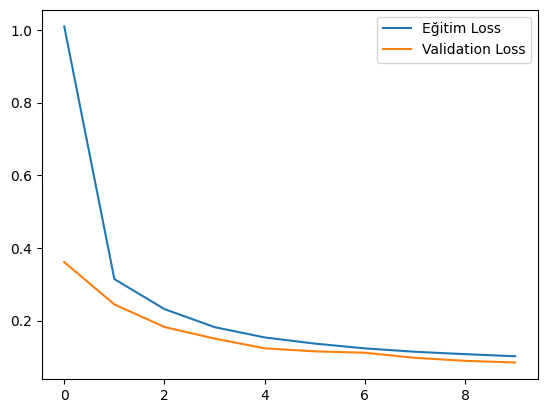

In [ ]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()



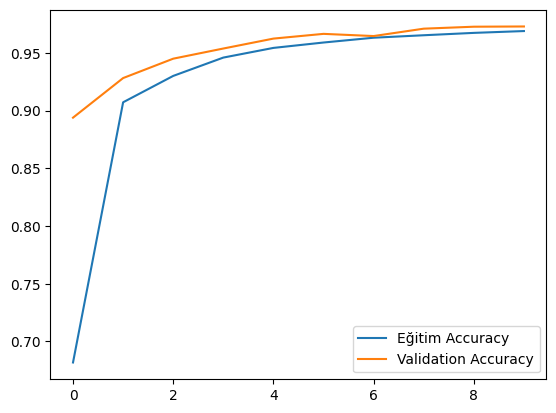

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
### Katman , filtre, aktivasyon fonksiyonu , noron sayısını vs değiştirerek başarımı artırın,
# diğer metrikleri denemeye çalşın